In [1]:
import numpy as np
import pandas as pd

In [2]:
# df = pd.read_parquet('df_clima_sp.parquet') 
df = pd.read_parquet('df_test.parquet') 
#df

In [3]:
df['data_int'] = df['data'].astype('int64') // 10**9

In [35]:
df.isnull().sum()

preciptacao                1211
percentage                    0
pressao_atm                 293
pressao_atm_max             296
pressao_atm_min             296
temperatura                 293
temperatura_orvalho         670
temperatura_max             297
temperatura_min             296
temperatura_orvalho_max     668
temperatura_orvalho_min     675
umidade_rel_ar_max          663
umidade_rel_ar_min          663
umidade_rel_ar              663
velocidade_vento            983
data                          0
data_int                      0
dtype: int64

In [4]:
df = df.ffill()
df.isnull().sum()

preciptacao                0
percentage                 0
pressao_atm                0
pressao_atm_max            0
pressao_atm_min            0
temperatura                0
temperatura_orvalho        0
temperatura_max            0
temperatura_min            0
temperatura_orvalho_max    0
temperatura_orvalho_min    0
umidade_rel_ar_max         0
umidade_rel_ar_min         0
umidade_rel_ar             0
velocidade_vento           0
data                       0
data_int                   0
dtype: int64

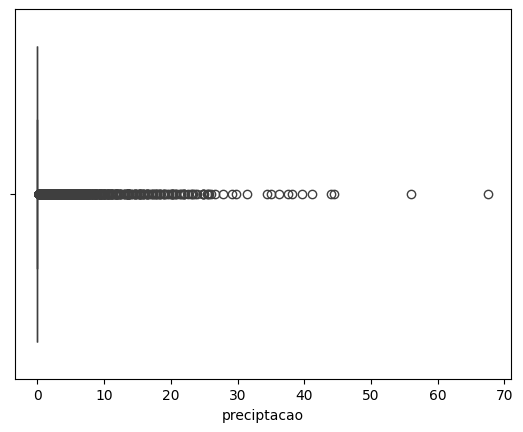

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando um box plot
sns.boxplot(x=df['preciptacao'])
plt.show()

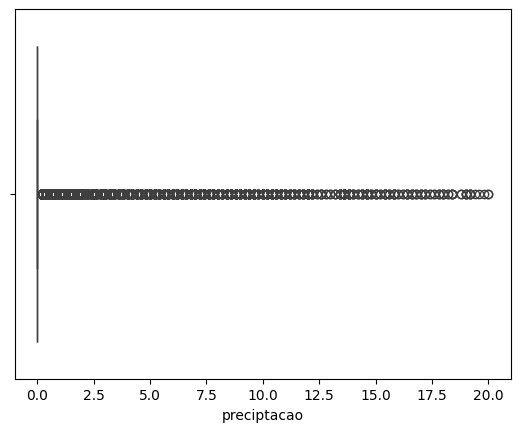

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


lower_limit = 0  # Defina o limite inferior
upper_limit = 20  # Defina o limite superior

df_no_outliers = df[(df['preciptacao'] >= lower_limit) & (df['preciptacao'] <= upper_limit)]

sns.boxplot(x=df_no_outliers['preciptacao'])
plt.show()

Mean Squared Error: 0.6207514393018408
Root Mean Squared Error: 0.7878778073418751
Variância da Precipitação nos Dados de Teste: preciptacao    0.9887
dtype: float64
R-squared (R2): 0.3721541336255453


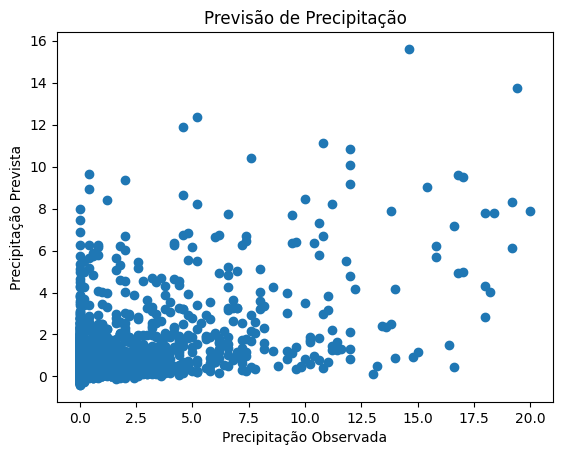

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


X = df_no_outliers[['pressao_atm','pressao_atm_max','pressao_atm_min','temperatura','temperatura_orvalho',
                    'temperatura_max','temperatura_min','temperatura_orvalho_max','temperatura_orvalho_min',
                    'umidade_rel_ar_max','umidade_rel_ar_min','umidade_rel_ar',
                    'velocidade_vento', 'data_int', 'percentage']]

y = df_no_outliers[['preciptacao']]

# Divida os dados em treino e teste
# train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Crie e treine o modelo XGBoost
model = XGBRegressor(objective='reg:squarederror', n_estimators=150, learning_rate=0.10995680003342174, max_depth=8)
model.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)
# Avalie o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

variance = np.var(y_test)
print(f'Variância da Precipitação nos Dados de Teste: {variance}')


r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2}')

# Visualizar as previsões
plt.scatter(y_test, y_pred)
plt.xlabel("Precipitação Observada")
plt.ylabel("Precipitação Prevista")
plt.title("Previsão de Precipitação")
plt.show()

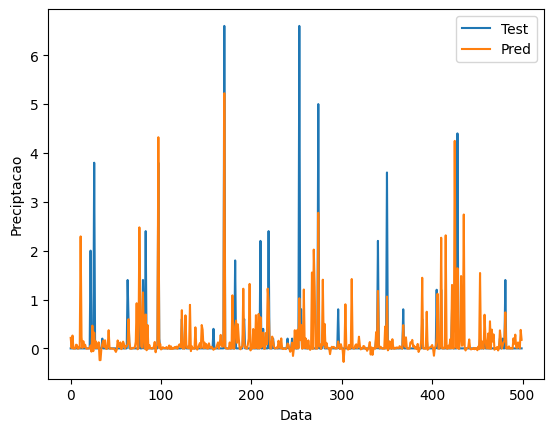

In [10]:
plt.plot([i for i in range(0,len(y_test[100:600]))], y_test[100:600],label='Test')
plt.plot([i for i in range(0,len(y_pred[100:600]))], y_pred[100:600], label='Pred')

plt.xlabel('Data')
plt.ylabel('Preciptacao')
plt.legend()
plt.show()

In [11]:
t = pd.DataFrame(y_pred)
t = t.rename(columns={0: 'prediction'})

In [12]:
q = X_test[['data_int']]

In [13]:
t = t.reset_index(drop=True)
q = q.reset_index(drop=True)
df3 = pd.concat([t, q], axis=1)
df3

,prediction,data_int
0,0.152670,1639414
1,0.074317,1547265
2,0.019816,1575392
3,0.006056,1566903
4,0.009643,1655816
...,...,...
21156,0.004704,1618603
21157,0.138152,1569229
21158,0.004454,1584104
21159,0.265696,1573207


In [15]:
epoch_ajustado = pd.to_datetime('2023-11-01 00:00:00').timestamp()

df3['coluna_data'] = pd.to_datetime(df['data_int'] + epoch_ajustado, unit='s')


In [16]:
df3

,prediction,data_int,coluna_data
0,0.152670,1639414,2023-11-18 21:31:40
1,0.074317,1547265,2023-11-18 21:31:44
2,0.019816,1575392,2023-11-18 21:31:48
3,0.006056,1566903,2023-11-18 21:31:51
4,0.009643,1655816,2023-11-18 21:31:55
...,...,...,...
21156,0.004704,1618603,2023-11-19 18:41:02
21157,0.138152,1569229,2023-11-19 18:41:06
21158,0.004454,1584104,2023-11-19 18:41:09
21159,0.265696,1573207,2023-11-19 18:41:13


In [18]:
df3 = df3.round(2)
df3

,prediction,data_int,coluna_data
0,0.15,1639414,2023-11-18 21:31:40
1,0.07,1547265,2023-11-18 21:31:44
2,0.02,1575392,2023-11-18 21:31:48
3,0.01,1566903,2023-11-18 21:31:51
4,0.01,1655816,2023-11-18 21:31:55
...,...,...,...
21156,0.00,1618603,2023-11-19 18:41:02
21157,0.14,1569229,2023-11-19 18:41:06
21158,0.00,1584104,2023-11-19 18:41:09
21159,0.27,1573207,2023-11-19 18:41:13


In [42]:
df3.to_parquet('pred.parquet')

In [ ]:
livro 5 aneis
tao te ching
arte da guerra
dropping ashes on the buddha
the tao of jeet kun do